In [487]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [488]:
# Reading and storing of data to a Data frame
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

# Data Inspection and Understanding

In [489]:
df.shape

(730, 16)

In [490]:
# understanding of data (columns, datatypes, null values)
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [491]:
# descriptive statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [492]:
df.season.unique()

array([1, 2, 3, 4])

In [493]:
df.weathersit.unique()

array([2, 1, 3])

In [494]:
df.instant.duplicated()[df.instant.duplicated()==True]

Series([], Name: instant, dtype: bool)

In [495]:
df.instant.unique

<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
      ... 
725    726
726    727
727    728
728    729
729    730
Name: instant, Length: 730, dtype: int64>

# Removing unwanted attributes

- Since we have all unique entries in 'instant' column so it is of no use in model
- Also 'dteday' it's a date format and we have separate column for date month and year so this can be dropped
- 'holiday' and 'workingday' is another correlated columns so either of one can be dropped
- 'temp' is more accurate than 'atemp', since 'atemp' is individual feeling temperature so can be dropped
- since 'cnt' is sum of 'casual' and 'registered' so these two columns can be dropped

In [496]:
# creating new dataframe without unwanted columns
df_new = df.drop(columns=['instant','dteday','holiday','casual','registered','atemp'])

In [497]:
df_new.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,43.6957,12.522300,1600


In [498]:
df_new.shape

(730, 10)

# Classifying Data (cat vs num)

In [499]:
# printing count of values of each attributes
for i in df_new:
    print(df_new[i].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64
9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, 

In [500]:
# Storing categorical columns
cat_col = ['season','yr','mnth','weekday','workingday','weathersit']

In [501]:
# changing data types of categorical column to 'Object' for easy handling
df_new[cat_col] = df_new[cat_col].astype('O')

In [502]:
# renaming 'cnt' as 'Target' for easier identification
df_new.rename(columns={'cnt':'Target'},inplace=True)

In [503]:
df_new.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,Target
0,1,0,1,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,5,1,1,9.305237,43.6957,12.522300,1600


In [504]:
# storing numerical columns
num_col = list(df_new.select_dtypes(exclude='O').columns)

In [505]:
num_col

['temp', 'hum', 'windspeed', 'Target']

# Data Visualisation

## Visualization of categorical variable

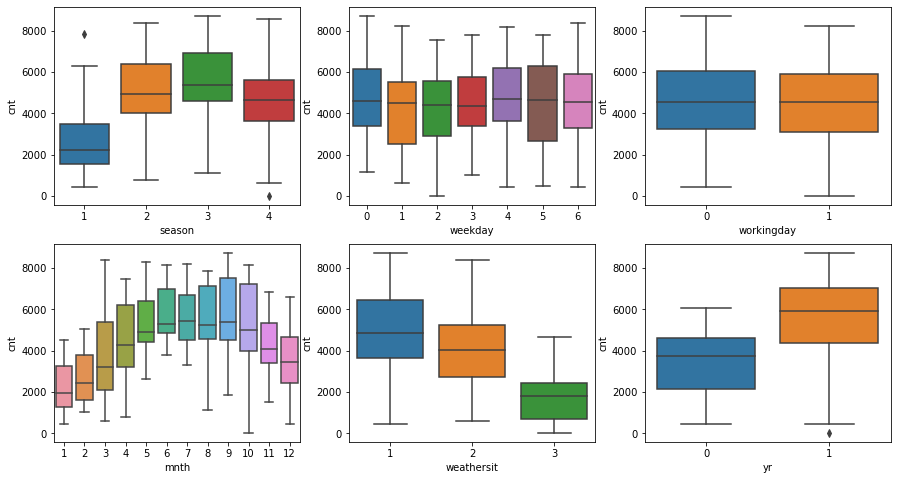

In [507]:
plt.figure(figsize=[15,8])
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='weathersit',y='cnt',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='yr',y='cnt',data=df)

plt.show()

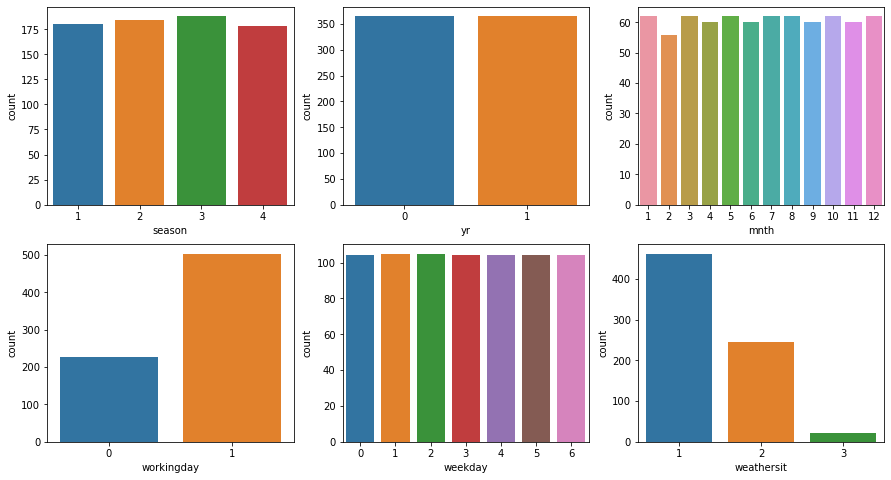

In [508]:
plt.figure(figsize=[15,8])
plt.subplot(2,3,1)
sns.countplot(x='season',data=df_new)

plt.subplot(2,3,2)
sns.countplot(x='yr',data=df_new)

plt.subplot(2,3,3)
sns.countplot(x='mnth',data=df_new)

plt.subplot(2,3,4)
sns.countplot(x='workingday',data=df_new)

plt.subplot(2,3,5)
sns.countplot(x='weekday',data=df_new)

plt.subplot(2,3,6)
sns.countplot(x='weathersit',data=df_new)

plt.show()

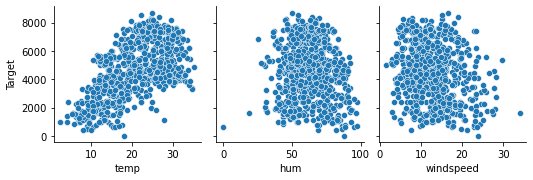

In [509]:
# scatter plot with 'Target' variable
sns.pairplot(df_new, x_vars=['temp','hum','windspeed'],y_vars='Target')

- we can see 'temp' has a strong relation to 'Target'

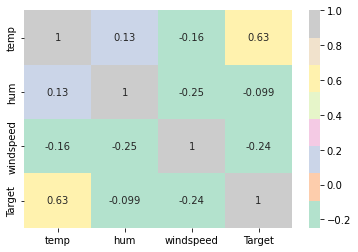

In [510]:
# correlation matrix
sns.heatmap(df_new.corr(),annot=True,cmap='Pastel2')
plt.show()

- above heatmap support the statement of 'temp' has a strong relation to 'Target variable

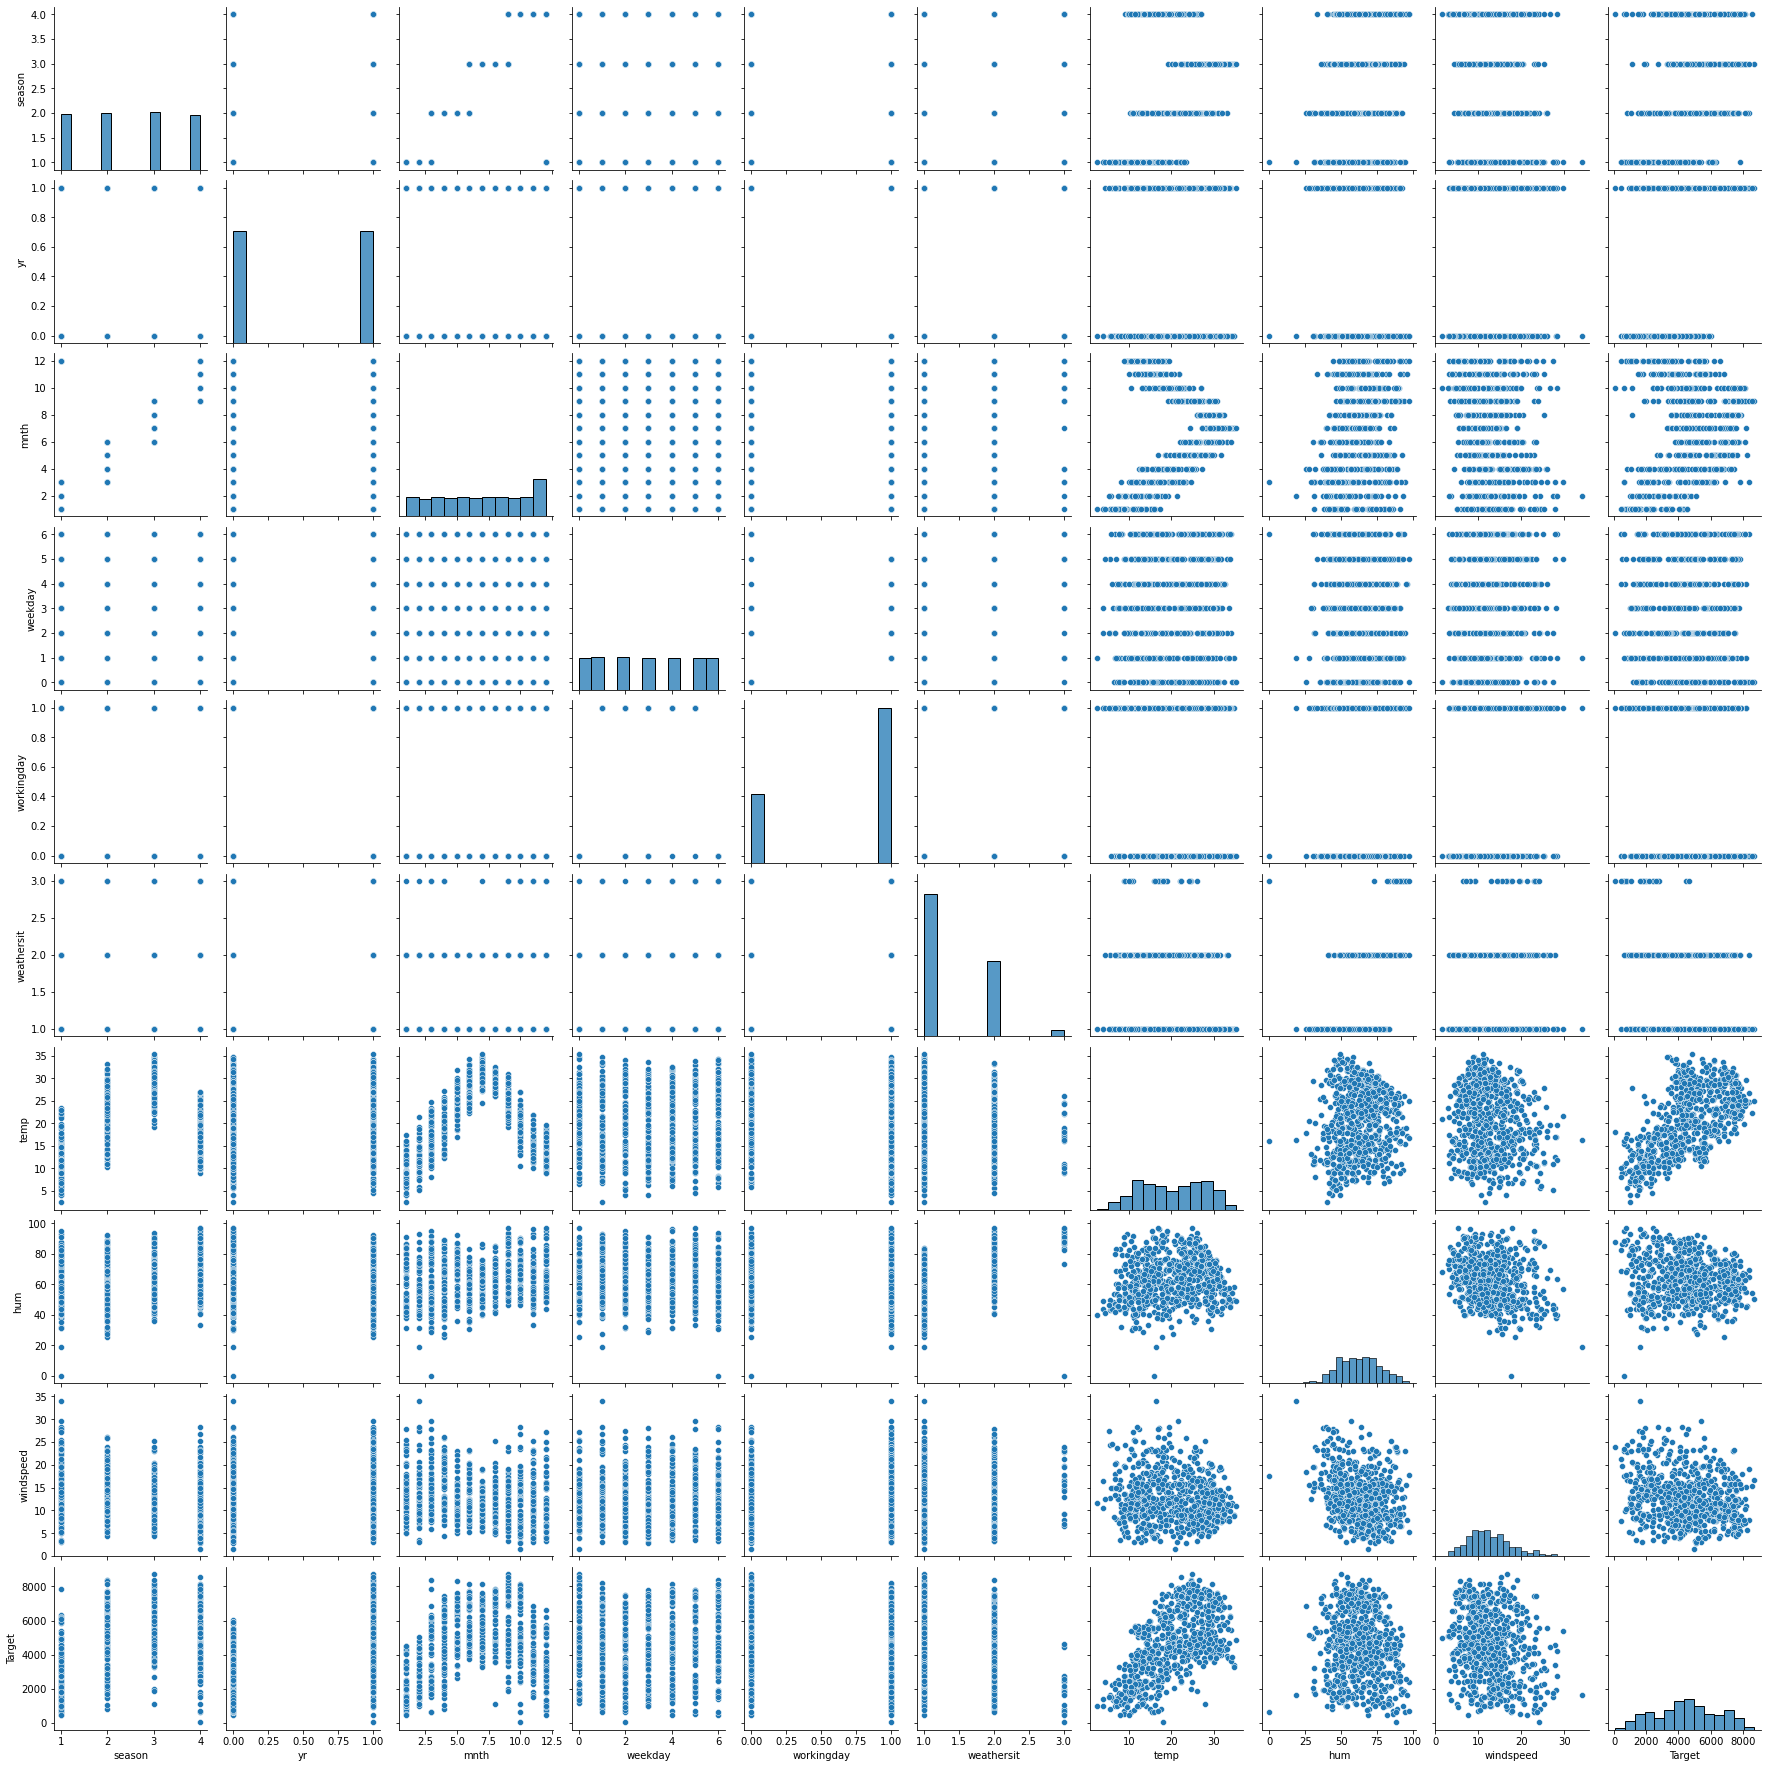

In [511]:
sns.pairplot(df_new)

# Data Pre-processing

## Adding Dummy variable for cat-col

In [512]:
cat_col

['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit']

In [513]:
num_col

['temp', 'hum', 'windspeed', 'Target']

In [514]:
# defining funtion for converting categorical columns to dummy values (0,1)
def getdummy(i):
    i_dummy = pd.get_dummies(df_new[i],prefix=i, prefix_sep="_",drop_first=True)
    d=pd.concat([df_new,i_dummy], axis=1)
    return d

In [515]:
# applying function
for i in cat_col:
    df_new = getdummy(i)

In [516]:
# printing columns after dummy value imputation
df_new.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'Target', 'season_2', 'season_3', 'season_4',
       'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [517]:
# Dropping Original categorical columns
df_new.drop(columns=cat_col, inplace=True)

In [518]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          730 non-null    float64
 1   hum           730 non-null    float64
 2   windspeed     730 non-null    float64
 3   Target        730 non-null    int64  
 4   season_2      730 non-null    uint8  
 5   season_3      730 non-null    uint8  
 6   season_4      730 non-null    uint8  
 7   yr_1          730 non-null    uint8  
 8   mnth_2        730 non-null    uint8  
 9   mnth_3        730 non-null    uint8  
 10  mnth_4        730 non-null    uint8  
 11  mnth_5        730 non-null    uint8  
 12  mnth_6        730 non-null    uint8  
 13  mnth_7        730 non-null    uint8  
 14  mnth_8        730 non-null    uint8  
 15  mnth_9        730 non-null    uint8  
 16  mnth_10       730 non-null    uint8  
 17  mnth_11       730 non-null    uint8  
 18  mnth_12       730 non-null    

# Splitting the Data into Training and Testing Sets

In [519]:
# splitting the data into Train and test
df_train, df_test = train_test_split(df_new, random_state=100, train_size=0.7)

In [520]:
df_train.shape

(510, 28)

In [521]:
df_test.shape

(220, 28)

# Scaling the data

### Here I'm using MinMaxScaler to scale the data

In [522]:
# scaling of data set to same scale using MinMax scaler
scaler = MinMaxScaler()

In [523]:
num_col

['temp', 'hum', 'windspeed', 'Target']

In [524]:
df_train[num_col] = scaler.fit_transform(df_train[num_col])

In [525]:
df_train.head()

,temp,hum,windspeed,Target,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
576,0.815169,0.725633,0.264686,0.827658,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,0,0,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

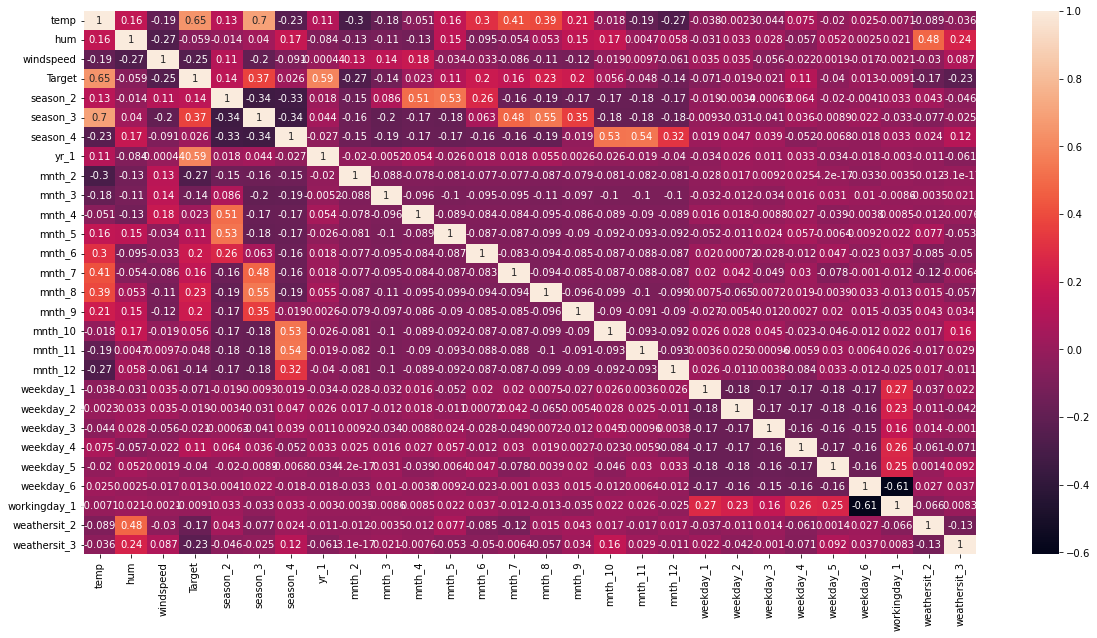

In [526]:
# correlation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df_train.corr(), annot=True)

In [527]:
df1 = df_train # making copy incase if required in future

In [528]:
y_train = df_train.pop('Target')
X_train = df_train

In [529]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: Target, dtype: float64

# Model Building using Stat model


## Model 1
#### with 27 variables

In [530]:
# building the base model with all the columns 
X_train_sm = sm.add_constant(X_train) # adding constant
model_sm = sm.OLS(y_train,X_train_sm)
result = model_sm.fit()

In [531]:
# printing summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     100.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.07e-178
Time:                        10:11:23   Log-Likelihood:                 520.75
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     482   BIC:                            -866.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2335      0.030      7.715      0.000       0.174       0.293
temp             0.4414      0.047      9.399      0.000       0.349       0.534
hum             -0.1551      0.039     -3.974      0.000      -0.232      -0.078
windspeed       -0.1842      0.026     -7.048      0.000      -0.236      -0.133
season_2         0.0865      0.024      3.613      0.000       0.039       0.133
season_3         0.0401      0.030      1.321      0.187      -0.020       0.100
season_4         0.1524      0.026      5.787      0.000       0.101       0.204
yr_1             0.2322      0.008     28.479      0.000       0.216       0.248
mnth_2           0.0269      0.021      1.291      0.197      -0.014       0.068
mnth_3           0.0652      0.023      2.879      0.004       0.021       0.110
mnth_4           0.0645      0.034      1.896      0.059      -0.002       0.131
mnth_5           0.0887      0.037      2.421      0.016       0.017       0.161
mnth_6           0.0725      0.039      1.843      0.066      -0.005       0.150
mnth_7           0.0356      0.044      0.799      0.425      -0.052       0.123
mnth_8           0.0911      0.042      2.155      0.032       0.008       0.174
mnth_9           0.1546      0.038      4.084      0.000       0.080       0.229
mnth_10          0.0698      0.035      1.997      0.046       0.001       0.138
mnth_11          0.0188      0.033      0.565      0.572      -0.046       0.084
mnth_12          0.0201      0.027      0.748      0.455      -0.033       0.073
weekday_1       -0.1069      0.032     -3.310      0.001      -0.170      -0.043
weekday_2       -0.1084      0.031     -3.452      0.001      -0.170      -0.047
weekday_3       -0.0928      0.030     -3.089      0.002      -0.152      -0.034
weekday_4       -0.0782      0.033     -2.405      0.017      -0.142      -0.014
weekday_5       -0.0824      0.032     -2.561      0.011      -0.146      -0.019
weekday_6       -0.0061      0.015     -0.392      0.695      -0.036       0.024
workingday_1     0.0741      0.029      2.583      0.010       0.018       0.130
weathersit_2    -0.0572      0.011     -5.415      0.000      -0.078      -0.036
weathersit_3    -0.2489      0.027     -9.311      0.000      -0.301      -0.196
==============================================================================
Omnibus:                       81.126   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.454
Skew:                          -0.795   Prob(JB):                     1.21e-46
Kurtosis:                       5.725   Cond. No.                         45.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

- The base model has R^2 score of 84.9 which is pretty good

# Recursive Feature Elimination

#### Since we have 27 columns and we will using automating feature elimination so that unnecessary attributes will be dropped

In [532]:
# Selecting important feature from automating technique with RFE
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=14)
rfe = rfe.fit(X_train,y_train)

In [533]:
# creating DataFrame with selected columns
X_train_rfe = X_train[list(X_train.columns[rfe.support_])]
X_train_rfe.columns

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1', 'mnth_9',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'workingday_1', 'weathersit_3'],
      dtype='object')

## Model 2 
#### with 14 variables

In [534]:
X_train_sm = sm.add_constant(X_train_rfe)
model_sm = sm.OLS(y_train,X_train_sm)
result = model_sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.79e-181
Time:                        10:11:23   Log-Likelihood:                 493.48
No. Observations:                 510   AIC:                            -957.0
Df Residuals:                     495   BIC:                            -893.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2718      0.027     10.055      0.000       0.219       0.325
temp             0.5914      0.020     29.322      0.000       0.552       0.631
hum             -0.2721      0.032     -8.551      0.000      -0.335      -0.210
windspeed       -0.2007      0.026     -7.630      0.000      -0.252      -0.149
season_2         0.0889      0.010      8.481      0.000       0.068       0.109
season_4         0.1434      0.011     13.391      0.000       0.122       0.164
yr_1             0.2276      0.008     27.165      0.000       0.211       0.244
mnth_9           0.1040      0.016      6.476      0.000       0.072       0.136
weekday_1       -0.1054      0.032     -3.268      0.001      -0.169      -0.042
weekday_2       -0.1080      0.031     -3.453      0.001      -0.169      -0.047
weekday_3       -0.0906      0.030     -3.038      0.003      -0.149      -0.032
weekday_4       -0.0757      0.032     -2.337      0.020      -0.139      -0.012
weekday_5       -0.0826      0.032     -2.581      0.010      -0.145      -0.020
workingday_1     0.0812      0.029      2.759      0.006       0.023       0.139
weathersit_3    -0.1958      0.026     -7.574      0.000      -0.247      -0.145
==============================================================================
Omnibus:                       65.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.077
Skew:                          -0.764   Prob(JB):                     1.39e-26
Kurtosis:                       4.808   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- we can see by dropping around 13 variables the R2 score doesn't varied much
- R2 score is 83.2%

In [535]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(len(X_train_rfe.columns))]
vif_data["VIF"] = round(vif_data["VIF"],2)
print(vif_data.sort_values(by='VIF', ascending=False))

         feature    VIF
12  workingday_1  36.07
1            hum  11.22
7      weekday_1   9.35
11     weekday_5   8.75
8      weekday_2   8.71
10     weekday_4   8.70
0           temp   7.20
9      weekday_3   6.98
2      windspeed   3.65
5           yr_1   2.02
4       season_4   1.65
3       season_2   1.59
6         mnth_9   1.21
13  weathersit_3   1.10


In [536]:
# dropping this variable with high vif value
X_train_rfe1 = X_train_rfe.drop(columns='workingday_1')

## Model 3

#### with 13 variables

In [537]:
X_train_sm = sm.add_constant(X_train_rfe1)
model_sm = sm.OLS(y_train,X_train_sm)
result = model_sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          8.61e-181
Time:                        10:11:23   Log-Likelihood:                 489.59
No. Observations:                 510   AIC:                            -951.2
Df Residuals:                     496   BIC:                            -891.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2703      0.027      9.935      0.000       0.217       0.324
temp             0.5941      0.020     29.296      0.000       0.554       0.634
hum             -0.2718      0.032     -8.484      0.000      -0.335      -0.209
windspeed       -0.2017      0.026     -7.617      0.000      -0.254      -0.150
season_2         0.0902      0.011      8.556      0.000       0.069       0.111
season_4         0.1441      0.011     13.371      0.000       0.123       0.165
yr_1             0.2273      0.008     26.957      0.000       0.211       0.244
mnth_9           0.1012      0.016      6.274      0.000       0.070       0.133
weekday_1       -0.0243      0.013     -1.822      0.069      -0.050       0.002
weekday_2       -0.0299      0.013     -2.233      0.026      -0.056      -0.004
weekday_3       -0.0177      0.014     -1.272      0.204      -0.045       0.010
weekday_4        0.0054      0.014      0.393      0.694      -0.022       0.032
weekday_5       -0.0025      0.014     -0.185      0.853      -0.029       0.024
weathersit_3    -0.1939      0.026     -7.454      0.000      -0.245      -0.143
==============================================================================
Omnibus:                       72.515   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.512
Skew:                          -0.811   Prob(JB):                     1.13e-31
Kurtosis:                       5.019   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [538]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe1.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(len(X_train_rfe1.columns))]
vif_data["VIF"] = round(vif_data["VIF"],2)
print(vif_data.sort_values(by='VIF', ascending=False))

         feature    VIF
1            hum  11.21
0           temp   7.19
2      windspeed   3.64
5           yr_1   2.02
4       season_4   1.65
3       season_2   1.59
8      weekday_2   1.56
7      weekday_1   1.53
11     weekday_5   1.52
10     weekday_4   1.50
9      weekday_3   1.47
6         mnth_9   1.20
12  weathersit_3   1.10


In [539]:
X_train_rfe2 = X_train_rfe1.drop(columns='hum')

## Model 4


#### with 12 variables

In [540]:
X_train_sm = sm.add_constant(X_train_rfe2)
model_sm = sm.OLS(y_train,X_train_sm)
result = model_sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.16e-167
Time:                        10:11:23   Log-Likelihood:                 455.04
No. Observations:                 510   AIC:                            -884.1
Df Residuals:                     497   BIC:                            -829.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0953      0.019      5.025      0.000       0.058       0.133
temp             0.5694      0.021     26.539      0.000       0.527       0.612
windspeed       -0.1449      0.027     -5.291      0.000      -0.199      -0.091
season_2         0.0822      0.011      7.323      0.000       0.060       0.104
season_4         0.1275      0.011     11.254      0.000       0.105       0.150
yr_1             0.2337      0.009     26.035      0.000       0.216       0.251
mnth_9           0.0862      0.017      5.027      0.000       0.052       0.120
weekday_1       -0.0231      0.014     -1.625      0.105      -0.051       0.005
weekday_2       -0.0354      0.014     -2.471      0.014      -0.063      -0.007
weekday_3       -0.0204      0.015     -1.372      0.171      -0.050       0.009
weekday_4        0.0091      0.015      0.623      0.534      -0.020       0.038
weekday_5       -0.0065      0.014     -0.451      0.653      -0.035       0.022
weathersit_3    -0.2508      0.027     -9.330      0.000      -0.304      -0.198
==============================================================================
Omnibus:                       65.498   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.028
Skew:                          -0.805   Prob(JB):                     2.11e-24
Kurtosis:                       4.593   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- By dropping 'hum' the model score was dropped to 80.4%

In [541]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe2.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(len(X_train_rfe2.columns))]
vif_data["VIF"] = round(vif_data["VIF"],2)
print(vif_data.sort_values(by='VIF', ascending=False))

         feature   VIF
0           temp  4.22
1      windspeed  3.26
4           yr_1  2.01
2       season_2  1.56
7      weekday_2  1.49
6      weekday_1  1.46
9      weekday_4  1.46
10     weekday_5  1.43
3       season_4  1.40
8      weekday_3  1.38
5         mnth_9  1.19
11  weathersit_3  1.07


In [542]:
# dropping the variable with high p-value
X_train_rfe3 = X_train_rfe2.drop(columns='weekday_5')

## Model 5

#### With 11 variables

In [543]:
X_train_sm = sm.add_constant(X_train_rfe3)
model_sm = sm.OLS(y_train,X_train_sm)
result = model_sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.71e-168
Time:                        10:11:23   Log-Likelihood:                 454.93
No. Observations:                 510   AIC:                            -885.9
Df Residuals:                     498   BIC:                            -835.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0929      0.018      5.119      0.000       0.057       0.129
temp             0.5696      0.021     26.579      0.000       0.528       0.612
windspeed       -0.1448      0.027     -5.291      0.000      -0.199      -0.091
season_2         0.0822      0.011      7.327      0.000       0.060       0.104
season_4         0.1275      0.011     11.263      0.000       0.105       0.150
yr_1             0.2338      0.009     26.069      0.000       0.216       0.251
mnth_9           0.0861      0.017      5.028      0.000       0.052       0.120
weekday_1       -0.0208      0.013     -1.570      0.117      -0.047       0.005
weekday_2       -0.0331      0.013     -2.474      0.014      -0.059      -0.007
weekday_3       -0.0181      0.014     -1.297      0.195      -0.046       0.009
weekday_4        0.0114      0.014      0.830      0.407      -0.016       0.038
weathersit_3    -0.2516      0.027     -9.388      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       65.041   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.902
Skew:                          -0.798   Prob(JB):                     2.25e-24
Kurtosis:                       4.606   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping this variable didn't varied the score

In [544]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe3.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(len(X_train_rfe3.columns))]
vif_data["VIF"] = round(vif_data["VIF"],2)
print(vif_data.sort_values(by='VIF', ascending=False))

         feature   VIF
0           temp  3.96
1      windspeed  3.12
4           yr_1  2.01
2       season_2  1.56
3       season_4  1.39
7      weekday_2  1.35
9      weekday_4  1.33
6      weekday_1  1.32
8      weekday_3  1.27
5         mnth_9  1.19
10  weathersit_3  1.07


In [545]:
# dropping variable with high p-value
X_train_rfe4 = X_train_rfe3.drop(columns='weekday_4')

## Model 6

#### with 10 variables

In [546]:
X_train_sm = sm.add_constant(X_train_rfe4)
model_sm = sm.OLS(y_train,X_train_sm)
result = model_sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.64e-169
Time:                        10:11:23   Log-Likelihood:                 454.58
No. Observations:                 510   AIC:                            -887.2
Df Residuals:                     499   BIC:                            -840.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0953      0.018      5.320      0.000       0.060       0.130
temp             0.5704      0.021     26.649      0.000       0.528       0.612
windspeed       -0.1450      0.027     -5.301      0.000      -0.199      -0.091
season_2         0.0826      0.011      7.383      0.000       0.061       0.105
season_4         0.1276      0.011     11.276      0.000       0.105       0.150
yr_1             0.2340      0.009     26.107      0.000       0.216       0.252
mnth_9           0.0860      0.017      5.023      0.000       0.052       0.120
weekday_1       -0.0237      0.013     -1.851      0.065      -0.049       0.001
weekday_2       -0.0360      0.013     -2.797      0.005      -0.061      -0.011
weekday_3       -0.0210      0.014     -1.556      0.120      -0.048       0.006
weathersit_3    -0.2533      0.027     -9.481      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       66.655   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.129
Skew:                          -0.813   Prob(JB):                     4.48e-25
Kurtosis:                       4.623   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping this variable didn't varied the score

In [547]:
# dropping variable with high p-value
X_train_rfe5 = X_train_rfe4.drop(columns='weekday_3')

## Model 7

#### with 9 variables

In [548]:
X_train_sm = sm.add_constant(X_train_rfe5)
model_sm = sm.OLS(y_train,X_train_sm)
result = model_sm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.52e-170
Time:                        10:11:23   Log-Likelihood:                 453.35
No. Observations:                 510   AIC:                            -886.7
Df Residuals:                     500   BIC:                            -844.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0899      0.018      5.108      0.000       0.055       0.124
temp             0.5721      0.021     26.728      0.000       0.530       0.614
windspeed       -0.1429      0.027     -5.222      0.000      -0.197      -0.089
season_2         0.0823      0.011      7.345      0.000       0.060       0.104
season_4         0.1269      0.011     11.206      0.000       0.105       0.149
yr_1             0.2338      0.009     26.048      0.000       0.216       0.251
mnth_9           0.0862      0.017      5.030      0.000       0.053       0.120
weekday_1       -0.0196      0.013     -1.561      0.119      -0.044       0.005
weekday_2       -0.0319      0.013     -2.527      0.012      -0.057      -0.007
weathersit_3    -0.2530      0.027     -9.459      0.000      -0.306      -0.200
==============================================================================
Omnibus:                       65.303   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.038
Skew:                          -0.790   Prob(JB):                     4.69e-25
Kurtosis:                       4.666   Cond. No.                         9.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Dropping this variable didn't varied the score

In [549]:
# dropping variable with high p-value
X_train_rfe6 = X_train_rfe5.drop(columns='weekday_1')

## Model 8

#### with 8 variables

In [550]:
X_train_sm = sm.add_constant(X_train_rfe6)
model_sm = sm.OLS(y_train,X_train_sm)
result_final = model_sm.fit()
result_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     254.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          7.19e-171
Time:                        10:11:23   Log-Likelihood:                 452.11
No. Observations:                 510   AIC:                            -886.2
Df Residuals:                     501   BIC:                            -848.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0863      0.017      4.940      0.000       0.052       0.121
temp             0.5726      0.021     26.718      0.000       0.531       0.615
windspeed       -0.1445      0.027     -5.278      0.000      -0.198      -0.091
season_2         0.0826      0.011      7.363      0.000       0.061       0.105
season_4         0.1266      0.011     11.165      0.000       0.104       0.149
yr_1             0.2342      0.009     26.061      0.000       0.217       0.252
mnth_9           0.0868      0.017      5.058      0.000       0.053       0.121
weekday_2       -0.0283      0.012     -2.277      0.023      -0.053      -0.004
weathersit_3    -0.2533      0.027     -9.456      0.000      -0.306      -0.201
==============================================================================
Omnibus:                       66.247   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.458
Skew:                          -0.801   Prob(JB):                     2.31e-25
Kurtosis:                       4.665   Cond. No.                         9.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The final model which has R^2 of 80.2% and adjusted R^2 of 79.9%

In [551]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe6.columns
  
vif_data["VIF"] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(len(X_train_rfe6.columns))]
vif_data["VIF"] = round(vif_data["VIF"],2)
print(vif_data.sort_values(by='VIF', ascending=False))

        feature   VIF
0          temp  3.66
1     windspeed  2.98
4          yr_1  2.00
2      season_2  1.55
3      season_4  1.35
5        mnth_9  1.19
6     weekday_2  1.18
7  weathersit_3  1.06


In [552]:
# storing the list of final columns which we get from the final model
final_col = list(X_train_rfe6.columns)

- Now as seen, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [553]:
df_test

,temp,hum,windspeed,Target,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,29.793347,63.7917,5.459106,6043,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
535,32.082500,59.2083,7.625404,6211,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
221,31.433347,42.4167,13.417286,4780,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
152,29.315000,30.5000,19.583229,4968,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,19.509153,73.3750,11.666643,6606,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
127,21.661653,63.1667,5.000712,4333,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
640,26.957500,79.3750,4.458569,7572,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
72,13.333897,49.6957,9.174042,2046,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [554]:
# transforming test data using MinMax scaler
df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,temp,hum,windspeed,Target,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
184,0.831783,0.657364,0.084219,0.692706,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
535,0.901354,0.610133,0.153728,0.712034,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
221,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [555]:
y_test = df_test.pop('Target')
X_test = df_test[final_col]

In [556]:
X_test = df_test[final_col]
X_test.head()

,temp,windspeed,season_2,season_4,yr_1,mnth_9,weekday_2,weathersit_3
184,0.831783,0.084219,0,0,0,0,0,0
535,0.901354,0.153728,1,0,1,0,0,0
299,0.511964,0.334206,0,1,0,0,0,0
221,0.881625,0.339570,0,0,0,0,0,0
152,0.817246,0.537414,1,0,0,0,0,0


In [557]:
X_test_sm = sm.add_constant(X_test)

In [558]:
X_test_sm.head()

,const,temp,windspeed,season_2,season_4,yr_1,mnth_9,weekday_2,weathersit_3
184,1.0,0.831783,0.084219,0,0,0,0,0,0
535,1.0,0.901354,0.153728,1,0,1,0,0,0
299,1.0,0.511964,0.334206,0,1,0,0,0,0
221,1.0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0


In [559]:
# prediction
y_pred = result_final.predict(X_test_sm)

In [560]:
# residue
Error = y_test-y_pred

# Model Evaluation

In [561]:
from sklearn.metrics import r2_score

In [562]:
# R^2 score
r2_score(y_test, y_pred)

0.770021761720211

In [563]:
result_final.params

const           0.086293
temp            0.572649
windspeed      -0.144491
season_2        0.082629
season_4        0.126591
yr_1            0.234154
mnth_9          0.086819
weekday_2      -0.028282
weathersit_3   -0.253306
dtype: float64

- from the above we can see the top 3 positively contributing attributes are
    - Temp
    - yr_1
    - season_4
- and top negatively contributing factors are
    - weathersit_3
    - windspeed
    - weekday_2

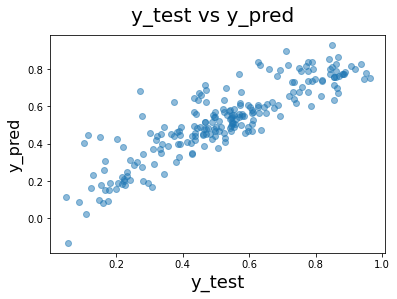

In [564]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

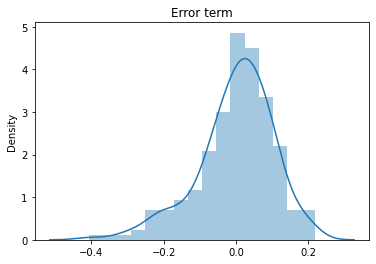

In [579]:
# Residual plot - check for Normal distribution of error terms
plt.title('Error term')
sns.distplot(Error)
plt.show()

- From the above graph we can see that the curse resembles a normal distribution
        - that means the assumptions of Linear regression satisfied and model is good to go for prediction

In [568]:
# To Check Expectation (mean) of residuals is zero
round(np.mean(Error),3)

-0.0

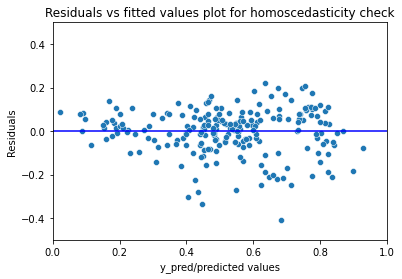

In [575]:
# Homoscedasticity check
p = sns.scatterplot(y_pred,Error)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
p = sns.lineplot([0,3],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

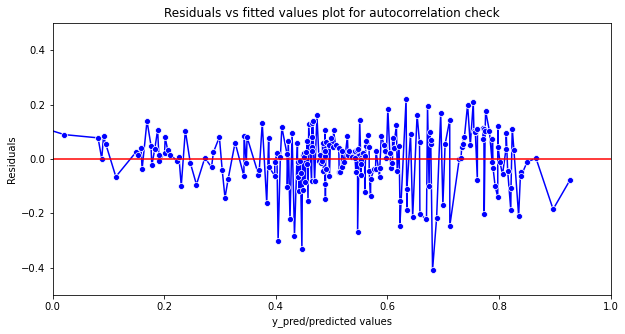

In [578]:
# Residual auto correlation check
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,Error,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.5,0.5)
plt.xlim(0,1)
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')